In [8]:
import gym
import numpy as np
import random
import time
import gym_sourcing
import matplotlib.pyplot as plt
env_name = "gym-sourcing-v0"
env = gym.make(env_name)




In [9]:
class Agent():
    def __init__(self, env):
        self.is_discrete = \
            type(env.action_space) == gym.spaces.discrete.Discrete

        if self.is_discrete:
            self.action_size = env.action_space.n
        else:
            self.action_low = env.action_space.low
            self.action_high = env.action_space.high
            self.action_shape = env.action_space.shape

    def get_action(self, state):
        if self.is_discrete:
            action = random.choice(range(self.action_size))
        else:
            action = np.random.uniform(self.action_low,
                                       self.action_high,
                                       self.action_shape)
        return action

class QAgent(Agent):
    def __init__(self, env, discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)
        self.state_size = env.observation_space.n
        print("State size:", self.state_size)

        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.build_model()

    def build_model(self):
        self.q_table = 1e-4 * np.random.random([self.state_size, self.action_size])

    def get_action(self, state):
        q_state = self.q_table[state]
        action_greedy = np.argmax(q_state)
        action_random = super().get_action(state)
        return action_random if random.random() < self.eps else action_greedy

    def train(self, experience):
        state, action, next_state, reward, done = experience

        q_next = self.q_table[next_state]
        q_next = np.zeros([self.action_size]) if done else q_next
        q_target = reward + self.discount_rate * np.max(q_next)

        q_update = q_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * q_update

        if done:
            self.eps = self.eps * 0.99





In [10]:



env.reset()

done = False
'''
for _ in range (19):
    if not done:
        action = env.action_space.sample()
        state,reward,done,info = env.step(action)
        env.render()
'''



'\nfor _ in range (19):\n    if not done:\n        action = env.action_space.sample()\n        state,reward,done,info = env.step(action)\n        env.render()\n'

In [15]:

agent = QAgent(env)
total_reward = 0
for ep in range(500):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        #print(state)
        #print(next_state)
        agent.train((state, action, next_state, reward, done))
        state = next_state
        total_reward += reward

        #print("s:", state, "a:", action)
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep, total_reward, agent.eps))
        #env.render()
        #print(agent.q_table)



State size: 60


Training finished


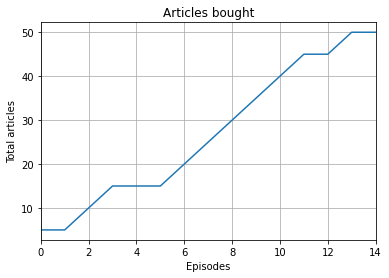

In [16]:
print("Training finished")
done = False
state = env.reset()
counter = 0
states = []
money = []
actions = []
while not done:
    action = agent.get_action(state)
    state, reward, done, info = env.step(action)
    states.append(state)
    actions.append(action)
    money.append(env.get_current_money())
    #env.render()
    counter = counter + 1

plt.title('Articles bought')
plt.ylabel('Total articles')
plt.xlabel('Episodes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(states)


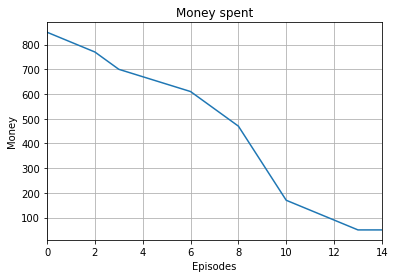

In [17]:
plt.title('Money spent')
plt.ylabel('Money')
plt.xlabel('Episodes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(money)

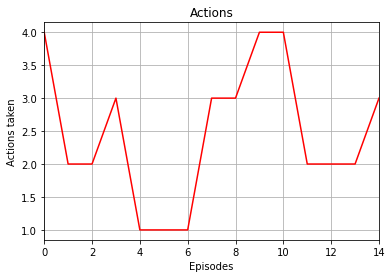

In [18]:
plt.title('Actions')
plt.ylabel('Actions taken')
plt.xlabel('Episodes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(actions,'r')